## PHASE 4 PROJECT : GROUP 6.
## Project Title: Time Series Modelling of Real Estate Value.

## Team Members
1. Pascalia Maiga
2. Ian Nzangi
3. Carol Mundia




## Introduction
This project aims to construct a time series model leveraging Zillow's dataset to assist real estate investors in making well-informed investment decisions.


## Overview
In this project we aim to do the following:

1. Loading the dataset.
2. Gaining a comprehensive understanding of the dataset.
3. dentifying and selecting our target variable.
4. Preparing the dataset, which involves tasks such as cleaning, checking for multicollinearity, and ensuring data integrity.
5. Encoding categorical variables to make them compatible with our modeling process.
6. Building several models to explore different approaches.
7. Evaluating the performance of our models using appropriate metrics.
8. Utilizing our trained models for making predictions.
9. Drawing meaningful insights and conclusions based on our findings.

##  Business understanding
Real estate investment stands as a profitable and ever-evolving industry, demanding meticulous analysis and strategic decision-making. A fictitious real estate investment firm is currently in search of insights to pinpoint the top five zip codes offering promising investment opportunities. To tackle this inquiry, we leverage historical data sourced from Zillow Research.

##  Objectives
The objectives of this project:
* To identify the top 5 zip codes, cities and states that offer the best investment potential in terms of real estate value. By analyzing historical trends and patterns, the project aims to provide actionable insights to the investment firm, enabling them to make informed decisions on where to allocate their resources.
* To analyze the historical data of the real estate value by looking into the monthly, quarterly, semi-annual and annual patterns over time. This will help in identifying trend and seasonality in the data.
* To create a time series model that will be able to predict future Real Estate Value.

##  Data Understanding

The dataset encompasses details on a range of attributes, including RegionID, RegionName, City, State, Metro, SizeRank, CountyName, and the value representing real estate prices. This dataset, known as the Zillow Housing Dataset, has been obtained from the Zillow Research Page.

To gain an initial insight into the structure of our dataset, let's load and preview the data.

In [126]:
#Importing the data libraries
import numpy as np
import pandas as pd
import itertools
import warnings
warnings.filterwarnings('ignore')

#importing visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing modeling libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet
import optuna
import joblib

In [127]:
import pandas as pd

def load_and_examine_data(file_path):
    try:
        # Load the data from the specified file path
        data = pd.read_csv(file_path)

        # Display the shape, columns, and the first few rows of the dataset
        print("----------------------------Details about the data----------------------------\n")
        print("----------------------------Shape of the dataset----------------------------\n")
        print(data.shape)
        print()
        
        print("----------------------------Columns of the dataset----------------------------\n")
        print(data.columns)
        print()
        
        print("----------------------------Head of the dataset----------------------------\n")
        print(data.head())
        print()
        
        # Display information about the dataset
        print("\n----------------------------Data Information----------------------------\n")
        print(data[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']].info())
        print("\n----------------------------Descriptive Statistics of the dataset----------------------------\n")
        print(data.describe(include='all'))  # Include='all' to describe all columns

        return data

    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Correct file path
file_path = r"C:\Users\Administrator\Downloads\zillow_data.csv" 
data = load_and_examine_data(file_path)


----------------------------Details about the data----------------------------

----------------------------Shape of the dataset----------------------------

(14723, 272)

----------------------------Columns of the dataset----------------------------

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

----------------------------Head of the dataset----------------------------

   RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     9314

The dataset contains the following columns:
* Region Id - is unique ID for the Regions

* Region Name contains the zip code for the region

* City Specific city name of housing data

* Metro Name of the metro city around that region

* County Name this is the county name of that region

* SizeRank this is the ranking done based on the size of that region

* Date this refers to a point in time

## Data Preparation

The code in the cell below  creates a copy of a DataFrame named `data` called `data2`. It then calculates the Return On Investment (ROI) for the entire period and also the yearly ROIs and then they are added as new columns in the copied DataFrame. We then select specific columns from the DataFrame `data2`, drop the columns not in the selection, and display the first few rows of the updated DataFrame.

In [128]:
# Create a copy of the original DataFrame

data2 = data.copy()

# Calculate Return On Investment and add new columns to the copied DataFrame
data2['Return On Investment'] = (data2['2018-04'] / data2['1996-04']) - 1
data2['Return On Investment(1996-1997)'] = (data2['1997-04'] / data2['1996-04']) - 1
data2['Return On Investment(1997-1998)'] = (data2['1998-04'] / data2['1997-04']) - 1
data2['Return On Investment(1998-1999)'] = (data2['1999-04'] / data2['1998-04']) - 1
data2['Return On Investment(1999-2000)'] = (data2['2000-04'] / data2['1999-04']) - 1
data2['Return On Investment(2000-2001)'] = (data2['2001-04'] / data2['2000-04']) - 1
data2['Return On Investment(2001-2002)'] = (data2['2002-04'] / data2['2001-04']) - 1
data2['Return On Investment(2002-2003)'] = (data2['2003-04'] / data2['2002-04']) - 1
data2['Return On Investment(2003-2004)'] = (data2['2004-04'] / data2['2003-04']) - 1
data2['Return On Investment(2004-2005)'] = (data2['2005-04'] / data2['2004-04']) - 1
data2['Return On Investment(2005-2006)'] = (data2['2006-04'] / data2['2005-04']) - 1
data2['Return On Investment(2006-2007)'] = (data2['2007-04'] / data2['2006-04']) - 1
data2['Return On Investment(2007-2008)'] = (data2['2008-04'] / data2['2007-04']) - 1
data2['Return On Investment(2008-2009)'] = (data2['2009-04'] / data2['2008-04']) - 1
data2['Return On Investment(2009-2010)'] = (data2['2010-04'] / data2['2009-04']) - 1
data2['Return On Investment(2010-2011)'] = (data2['2011-04'] / data2['2010-04']) - 1
data2['Return On Investment(2011-2012)'] = (data2['2012-04'] / data2['2011-04']) - 1
data2['Return On Investment(2012-2013)'] = (data2['2013-04'] / data2['2012-04']) - 1
data2['Return On Investment(2013-2014)'] = (data2['2014-04'] / data2['2013-04']) - 1
data2['Return On Investment(2014-2015)'] = (data2['2015-04'] / data2['2014-04']) - 1
data2['Return On Investment(2015-2016)'] = (data2['2016-04'] / data2['2015-04']) - 1
data2['Return On Investment(2016-2017)'] = (data2['2017-04'] / data2['2016-04']) - 1
data2['Return On Investment(2017-2018)'] = (data2['2018-04'] / data2['2017-04']) - 1

# Sorting the values based on ROI
data2.sort_values(by='Return On Investment', ascending=False, inplace=True)

# Select specific columns from the DataFrame
columns_selected = data2[['RegionID', 
                          'RegionName', 
                          'City', 
                          'State', 
                          'Metro', 
                          'CountyName', 
                          'SizeRank', 
                          'Return On Investment',
                          'Return On Investment(1996-1997)',
                          'Return On Investment(1997-1998)',
                          'Return On Investment(1998-1999)',
                          'Return On Investment(1999-2000)',
                          'Return On Investment(2000-2001)',
                          'Return On Investment(2001-2002)',
                          'Return On Investment(2002-2003)',
                          'Return On Investment(2003-2004)',
                          'Return On Investment(2004-2005)',
                          'Return On Investment(2005-2006)',
                          'Return On Investment(2006-2007)',
                          'Return On Investment(2007-2008)',
                          'Return On Investment(2008-2009)',
                          'Return On Investment(2009-2010)',
                          'Return On Investment(2010-2011)',
                          'Return On Investment(2011-2012)',
                          'Return On Investment(2012-2013)',
                          'Return On Investment(2013-2014)',
                          'Return On Investment(2014-2015)',
                          'Return On Investment(2015-2016)',
                          'Return On Investment(2016-2017)',
                          'Return On Investment(2017-2018)']]

# Iterate through all columns in the DataFrame
for column in data2.columns:

    # Drop columns that are not in the selected list
    if column not in columns_selected:
        data2.drop(column, axis=1, inplace = True)
        
# Display the first few rows of the updated DataFrame
data2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Return On Investment,Return On Investment(1996-1997),Return On Investment(1997-1998),...,Return On Investment(2008-2009),Return On Investment(2009-2010),Return On Investment(2010-2011),Return On Investment(2011-2012),Return On Investment(2012-2013),Return On Investment(2013-2014),Return On Investment(2014-2015),Return On Investment(2015-2016),Return On Investment(2016-2017),Return On Investment(2017-2018)
117,62022,11211,New York,NY,New York,Kings,118,11.189940,0.009009,0.081101,...,-0.042456,-0.051515,0.044560,0.120573,0.127568,0.265129,0.084391,0.247771,-0.005359,0.214981
1155,62033,11222,New York,NY,New York,Kings,1156,10.535523,-0.013405,0.069973,...,-0.066457,-0.067500,0.193432,0.017289,0.116839,0.208978,0.305119,0.257735,0.032013,0.065631
475,62027,11216,New York,NY,New York,Kings,476,9.942505,0.074606,0.068790,...,-0.223798,-0.134312,0.064957,0.121989,0.117902,0.284188,0.291848,0.205190,0.115802,0.109823
191,60639,7302,Jersey City,NJ,New York,Hudson,192,9.403061,0.067055,0.100410,...,-0.113718,-0.083611,-0.066930,0.114194,0.006681,0.174510,-0.014383,0.304235,0.268032,0.124478
106,62026,11215,New York,NY,New York,Kings,107,8.941958,0.130261,0.116033,...,-0.026198,-0.081514,0.124704,0.003509,0.039005,0.283802,0.119066,0.090937,0.045376,0.024191


In [129]:
# Looking at the shape of data2
data2.shape

(14723, 30)

In this section, we define a function `data_prep` that performs checks for missing values, duplicated values, and placeholder values in the dataset.

In [130]:
# Creating a function that returns null, duplicated and placeholder values in the dataset.
def data_prep(df):
    print('-------------------------Missing Values Check---------------------------------------\n')
    print(f'Number of null values in each column in the dataset:\n{df.isnull().sum()}\n')
    print('-------------------------Duplicated Values Check------------------------------------\n')
    print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}\n')
    print('-------------------------Placeholder Values Check-----------------------------------\n')
    for column in df.columns:
        unique_values = df[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
        placeholder_count = len(placeholders)
    
        print(f"Column: '{column}'")
        print(f"Placeholders found: {placeholders}")
        print(f"Count of placeholders: {placeholder_count}\n")
        
# Checking in our dataset.
data_prep(data2)

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
RegionID                              0
RegionName                            0
City                                  0
State                                 0
Metro                              1043
CountyName                            0
SizeRank                              0
Return On Investment               1039
Return On Investment(1996-1997)    1039
Return On Investment(1997-1998)    1039
Return On Investment(1998-1999)    1036
Return On Investment(1999-2000)    1036
Return On Investment(2000-2001)    1036
Return On Investment(2001-2002)    1036
Return On Investment(2002-2003)    1036
Return On Investment(2003-2004)    1036
Return On Investment(2004-2005)     887
Return On Investment(2005-2006)     801
Return On Investment(2006-2007)     667
Return On Investment(2007-2008)     620
Return On Investment(2008-2009)     607
Return On Investment(

In [131]:
# Remove rows with missing values (NaN) from the DataFrame 'data2' in-place
data2.dropna(inplace = True)

# Display the count of missing values in each column after dropping NaN values
data2.isna().sum()

RegionID                           0
RegionName                         0
City                               0
State                              0
Metro                              0
CountyName                         0
SizeRank                           0
Return On Investment               0
Return On Investment(1996-1997)    0
Return On Investment(1997-1998)    0
Return On Investment(1998-1999)    0
Return On Investment(1999-2000)    0
Return On Investment(2000-2001)    0
Return On Investment(2001-2002)    0
Return On Investment(2002-2003)    0
Return On Investment(2003-2004)    0
Return On Investment(2004-2005)    0
Return On Investment(2005-2006)    0
Return On Investment(2006-2007)    0
Return On Investment(2007-2008)    0
Return On Investment(2008-2009)    0
Return On Investment(2009-2010)    0
Return On Investment(2010-2011)    0
Return On Investment(2011-2012)    0
Return On Investment(2012-2013)    0
Return On Investment(2013-2014)    0
Return On Investment(2014-2015)    0
R

In [132]:
#Creating an average Returns On Investment column 
columns_to_sum = data2.columns[8:]
data2['Cumulative_ROI'] = data2[columns_to_sum].cumsum(axis=1).iloc[:, -1]
data2['Average_ROI'] = data2['Cumulative_ROI']/22

# Changing the datatype of regionname
data2['RegionName']= data2['RegionName'].astype(str)

#Sorting the data using ther average ROI
data2.sort_values(by='Average_ROI', ascending=False, inplace=True)
data2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Return On Investment,Return On Investment(1996-1997),Return On Investment(1997-1998),...,Return On Investment(2010-2011),Return On Investment(2011-2012),Return On Investment(2012-2013),Return On Investment(2013-2014),Return On Investment(2014-2015),Return On Investment(2015-2016),Return On Investment(2016-2017),Return On Investment(2017-2018),Cumulative_ROI,Average_ROI
117,62022,11211,New York,NY,New York,Kings,118,11.189940,0.009009,0.081101,...,0.044560,0.120573,0.127568,0.265129,0.084391,0.247771,-0.005359,0.214981,2.791515,0.126887
1155,62033,11222,New York,NY,New York,Kings,1156,10.535523,-0.013405,0.069973,...,0.193432,0.017289,0.116839,0.208978,0.305119,0.257735,0.032013,0.065631,2.735731,0.124351
475,62027,11216,New York,NY,New York,Kings,476,9.942505,0.074606,0.068790,...,0.064957,0.121989,0.117902,0.284188,0.291848,0.205190,0.115802,0.109823,2.680834,0.121856
191,60639,7302,Jersey City,NJ,New York,Hudson,192,9.403061,0.067055,0.100410,...,-0.066930,0.114194,0.006681,0.174510,-0.014383,0.304235,0.268032,0.124478,2.639412,0.119973
11728,62281,11930,Amagansett,NY,New York,Suffolk,11729,8.564860,-0.026797,0.025657,...,-0.027290,0.160636,-0.025135,0.178507,0.039427,0.101388,0.082175,0.180199,2.528644,0.114938


We write a function `check_outliers` to identify and print the number of outliers in numeric columns of a dataframe. 
It then selects numeric columns from `data2` using `select_dtypes` and calls the `check_outliers` with the specified DataFrame and columns.

In [133]:
#Checking for outliers
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr
        
# Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

#Call the function
columns_to_check = data2.select_dtypes(include = ['number'])
check_outliers(data2, columns_to_check)

RegionID
Number of outliers: 101

SizeRank
Number of outliers: 0

Return On Investment
Number of outliers: 700

Return On Investment(1996-1997)
Number of outliers: 439

Return On Investment(1997-1998)
Number of outliers: 707

Return On Investment(1998-1999)
Number of outliers: 554

Return On Investment(1999-2000)
Number of outliers: 583

Return On Investment(2000-2001)
Number of outliers: 359

Return On Investment(2001-2002)
Number of outliers: 150

Return On Investment(2002-2003)
Number of outliers: 191

Return On Investment(2003-2004)
Number of outliers: 410

Return On Investment(2004-2005)
Number of outliers: 232

Return On Investment(2005-2006)
Number of outliers: 417

Return On Investment(2006-2007)
Number of outliers: 409

Return On Investment(2007-2008)
Number of outliers: 457

Return On Investment(2008-2009)
Number of outliers: 726

Return On Investment(2009-2010)
Number of outliers: 651

Return On Investment(2010-2011)
Number of outliers: 431

Return On Investment(2011-2012)
N

The code below generates a boxplot to visually inspect and identify potential outliers in the numeric columns of the DataFrame `data2`, providing a comprehensive overview of the distribution and variability of the data

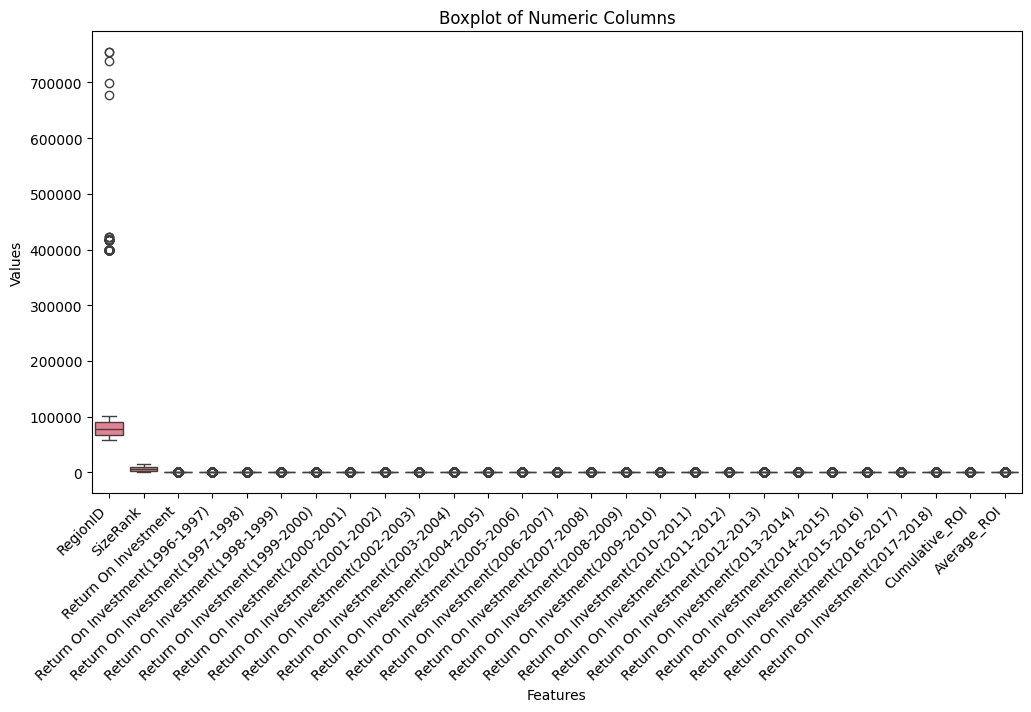

In [134]:
# Plotting a boxplot to check for outliers
features_to_plot = data2.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show()

The boxplots indicates there are outliers present but we cant drop them because they are actual events recorded.

The function below takes a wide-form dataframe and melts it into a long-form DataFrame, converts the `Date` column to datetime format, drops rows with missing `value` entries, and finally returns a dataframe grouped by date with the mean value for each date.

In [135]:
#Melt Data Function
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    #Melt the DataFrame
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='Date')
    
    #Convert the 'Date' column to datatime format
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    
    #Drop rows with missing 'value' entries
    melted = melted.dropna(subset=['value'])

    #Group by 'Date' and calculate the mean of the 'value' column
    return melted.groupby('Date').aggregate({'value':'mean'})

The code below reshapes the DataFrame `data` using the pandas melt_data function and stores the result in a new DataFrame `data3`, providing an initial view of the reshaped data.

In [136]:
# Reshape the DataFrame 'data' using the 'melt_data' function and store the result in 'data3'
data3 = melt_data(data)

# Display the first few rows of the reshaped DataFrame 'data3'
data3.head()

,value
Date,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


In [137]:
# Checking the shape of data3
data3.shape

(265, 1)

In [138]:
# Call the 'data_prep' function to perform data preparation steps on the DataFrame 'data3'
data_prep(data3)

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
value    0
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'value'
Placeholders found: []
Count of placeholders: 0



## Exprolatory Data Analysis

#### Univariate Analysis

We will begin this analysis by plotting a histogram of the `Return On Investment` column to look at its distribution.

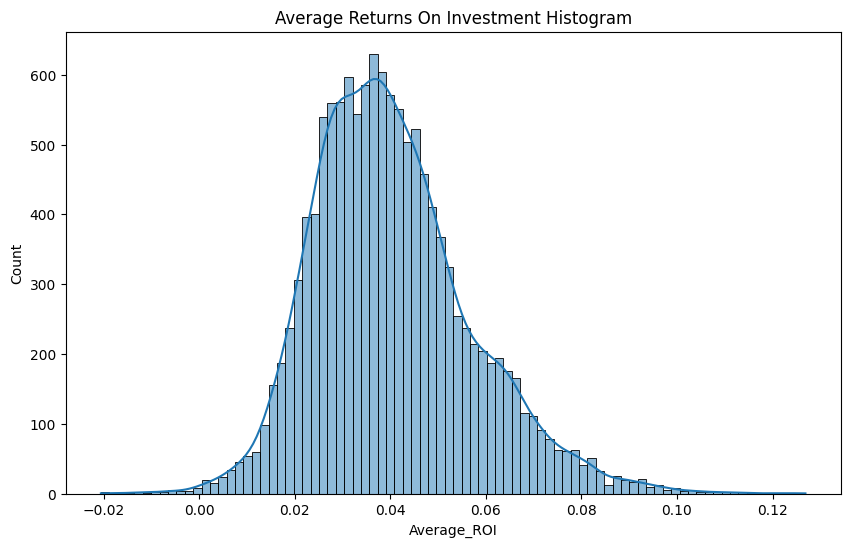

In [139]:
# Creating histograms for selected columns
plt.figure(figsize=(10, 6))
sns.histplot(data=data2, x='Average_ROI', bins = 'auto', common_norm = False, kde = True)
plt.title('Average Returns On Investment Histogram')
plt.show()

The average returns on investment has a normal distribution. This can be seen by the shape of the histogran which is bell-shaped. We will now create a countplot to see the number of real estate houses in each state.

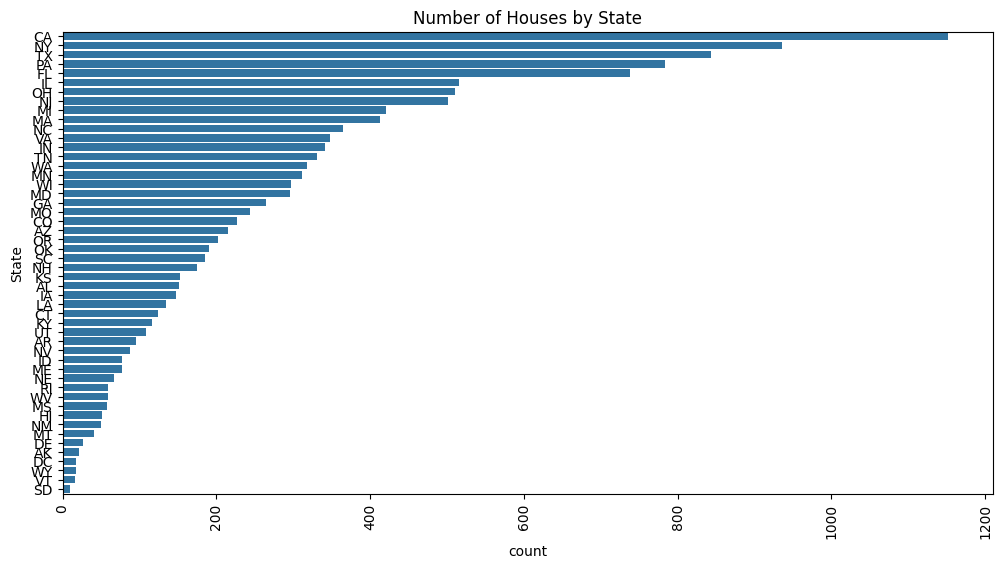

In [140]:
# Countplot for the number of houses by state
plt.figure(figsize=(12,6))
sns.countplot(data2['State'], order=data2['State'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Number of Houses by State')
plt.show()

The number of houses was highest in California, New York, Texas, Pennsylvania, and Florida, respectively. The states with the least number of houses were South Dakota, Vermont, Washington DC, Wyoming, and Arkansas, respectively. This could be attributed to the size of the population of these states. We can now go ahead to the bivariate analysis.

#### Bivariate Analysis

We will begin the bivariate analysis by taking a look at the best and worst performing zip codes by ROI.

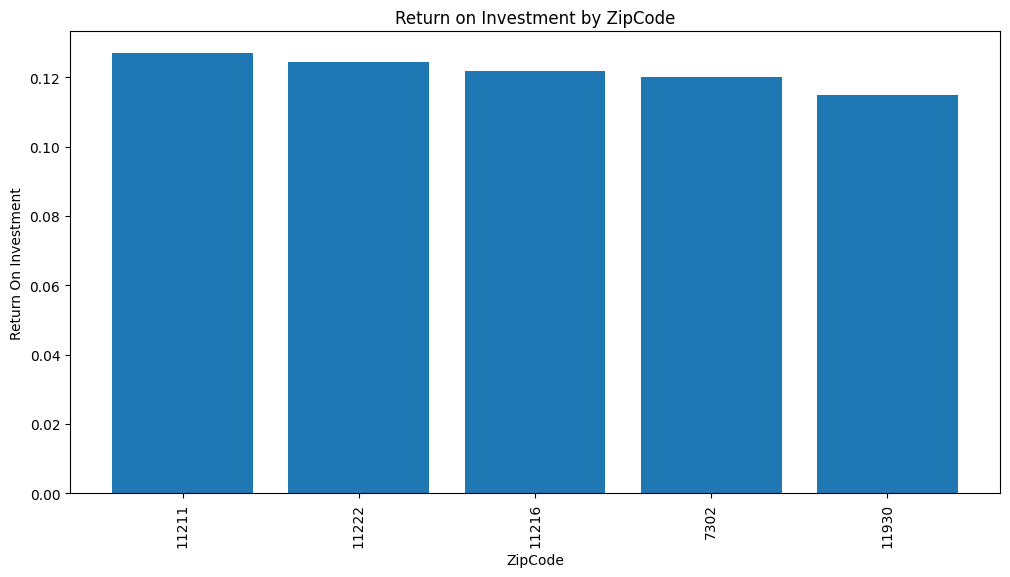

In [141]:
# Top five zipcodes with highest ROI
plt.figure(figsize= (12,6)) 
plt.bar(data2['RegionName'][:5], data2['Average_ROI'][:5])
plt.xticks(rotation=90)
plt.title('Return on Investment by ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Return On Investment')
plt.show()

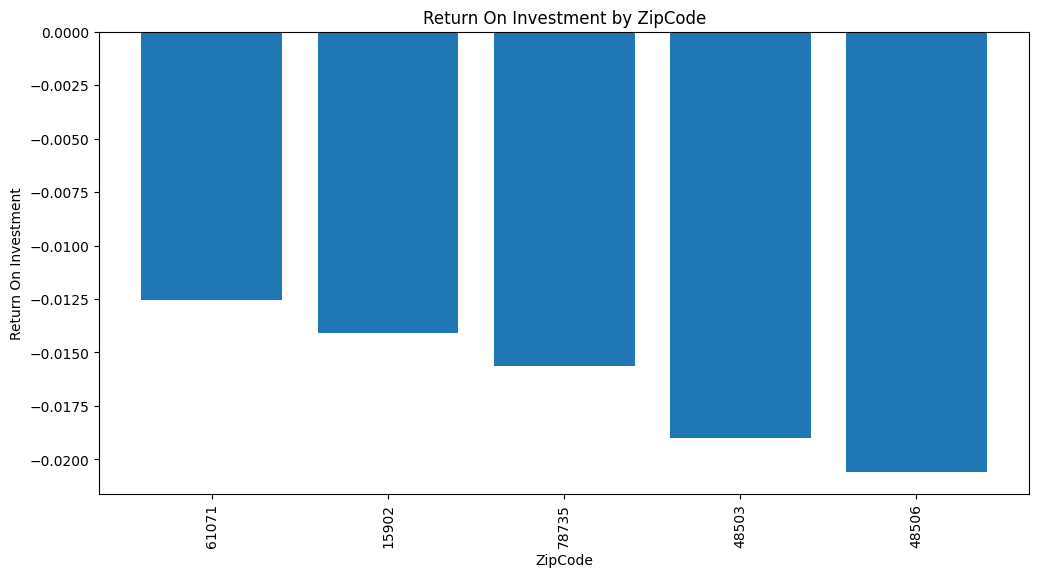

In [142]:
# Regions with the lowest returns on investment
plt.figure(figsize= (12,6)) 
plt.bar(data2['RegionName'][-5:], data2['Average_ROI'][-5:])
plt.xticks(rotation=90)
plt.title('Return On Investment by ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Return On Investment')
plt.show()

The zip codes with the best ROI performance were:
1. `11211` - Brooklyn, New York.
2. `11222` - Brooklyn, New York.
3. `11216` - Brooklyn, New York.
4. `7302` - Jersey City, New Jersey.
5. `11930` - Amagansett, New York.

The zip codes with the worst ROI performance were:
1. `48506` - Flint, Michigan.
2. `48503` - Flint, Michigan.
3. `78735` - Austin, Texas.
4. `15902` - Johnstown, Pennsylvania.
5. `61071` - Rock Falls, Illinois.

We can now go ahead and check on the ROI performance per city.

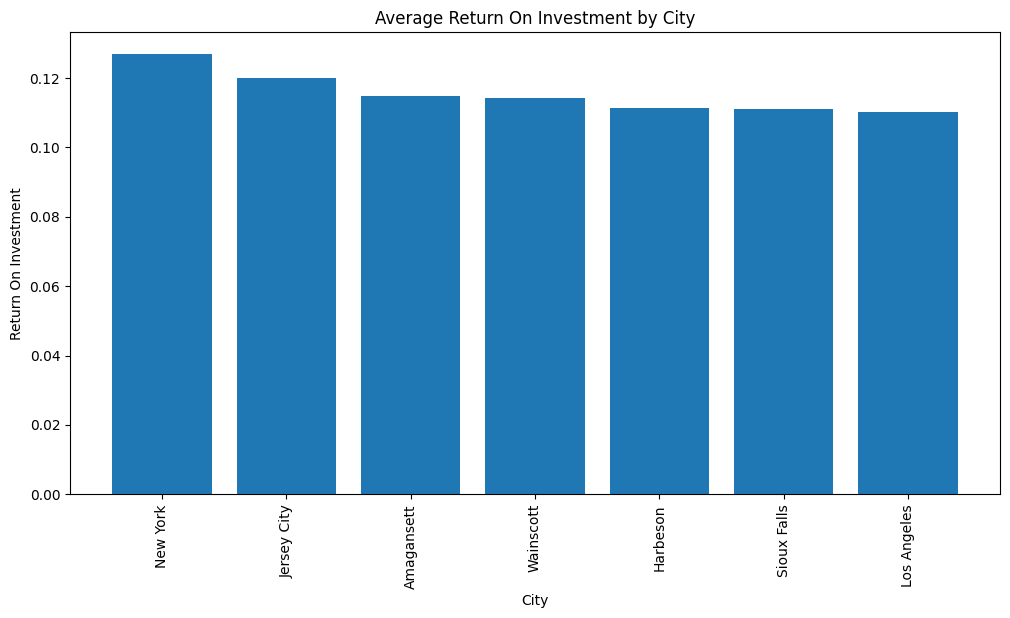

In [143]:
# Top five cities with highest ROI
plt.figure(figsize= (12,6)) 
plt.bar(data2['City'][:10], data2['Average_ROI'][:10])
plt.xticks(rotation=90)
plt.title('Average Return On Investment by City')
plt.xlabel('City')
plt.ylabel('Return On Investment')
plt.show()

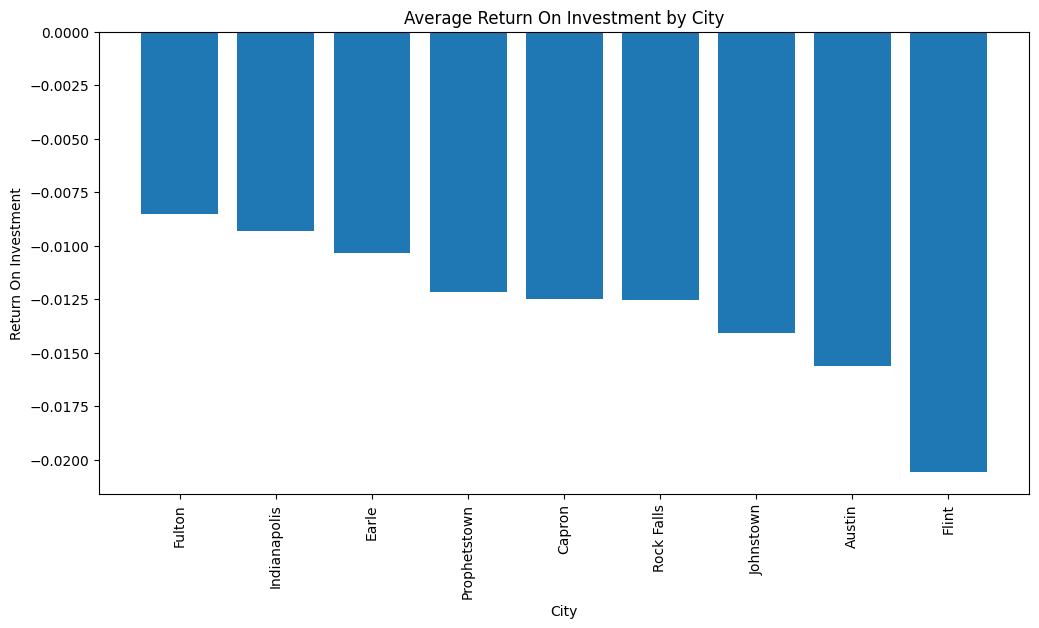

In [144]:
# Cities with the lowest returns on investment
plt.figure(figsize= (12,6)) 
plt.bar(data2['City'][-10:], data2['Average_ROI'][-10:])
plt.xticks(rotation=90)
plt.title('Average Return On Investment by City')
plt.xlabel('City')
plt.ylabel('Return On Investment')
plt.show()

The cities with the highest returns on investment are New York, Jersey City, Amagansett, Wainscott, , Harbeson, Sioux Falls and Los Angeles. However, the cities with the lowest returns on investment are Flint, Austin, Johnstown,Rock Falls, Carpron,  Prophetstown, Earle, Indianapolis, and Fulton. Now, proceeding to the best and worst performing states based on the returns on investment.

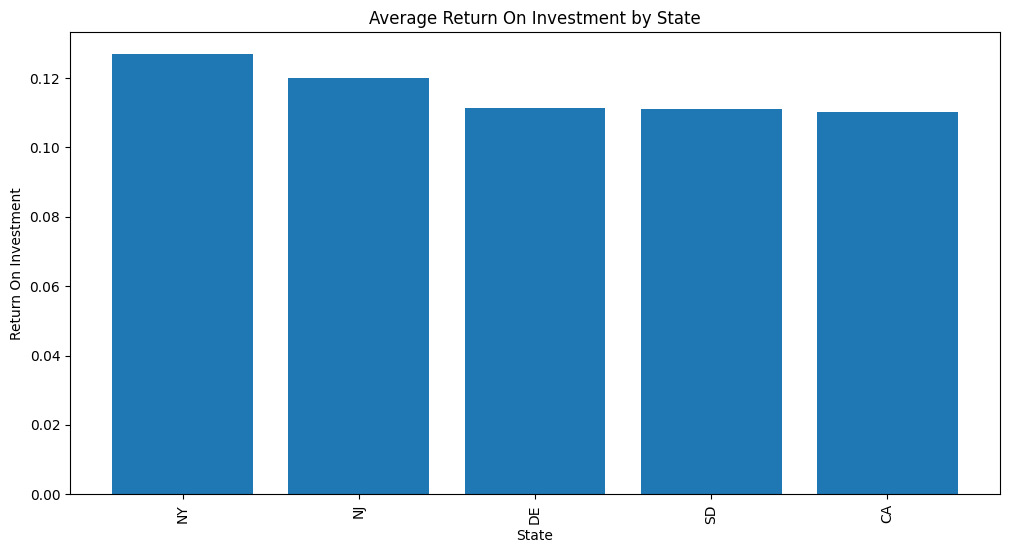

In [145]:
# Top five states with highest ROI 
plt.figure(figsize= (12,6)) 
plt.bar(data2['State'][:10], data2['Average_ROI'][:10])
plt.xticks(rotation=90)
plt.title('Average Return On Investment by State')
plt.xlabel('State')
plt.ylabel('Return On Investment')
plt.show()

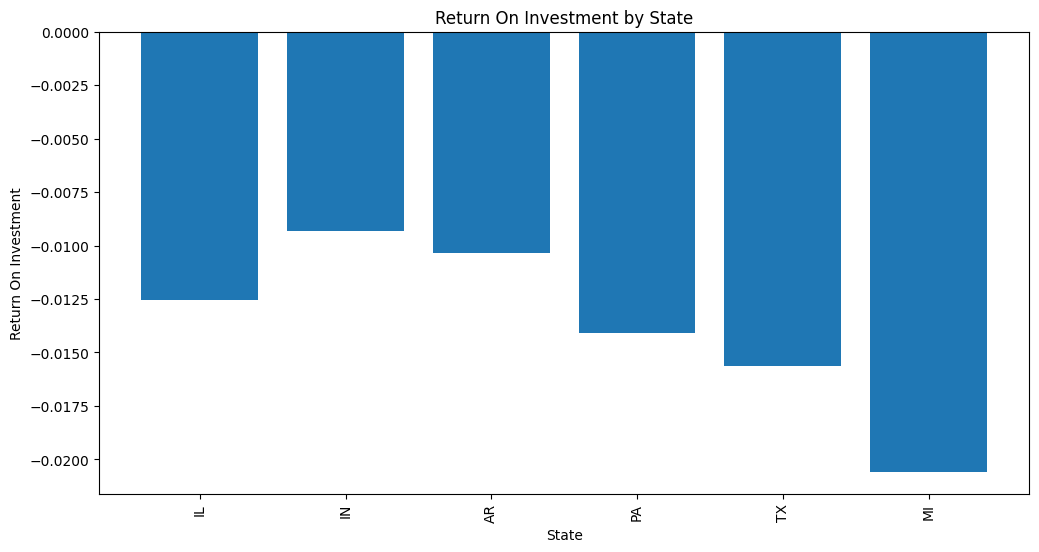

In [146]:
# Bottom five states with highest ROI 
plt.figure(figsize= (12,6)) 
plt.bar(data2['State'][-10:], data2['Average_ROI'][-10:])
plt.xticks(rotation=90)
plt.title('Return On Investment by State')
plt.xlabel('State')
plt.ylabel('Return On Investment')
plt.show()

The states with the highest reurns on investment are New York, New Jersey, Delaware, South Dakota, and Califonia. On the other hand, the states with the lowest returns on investment are Michigan, Texas, Pennsylvania, Arkansas,Indiana, and Illinois. We can go ahead and conduct time series analysis. 

### Time Series Analysis

We will first plot a histogram of the time series data to check for its distribution.

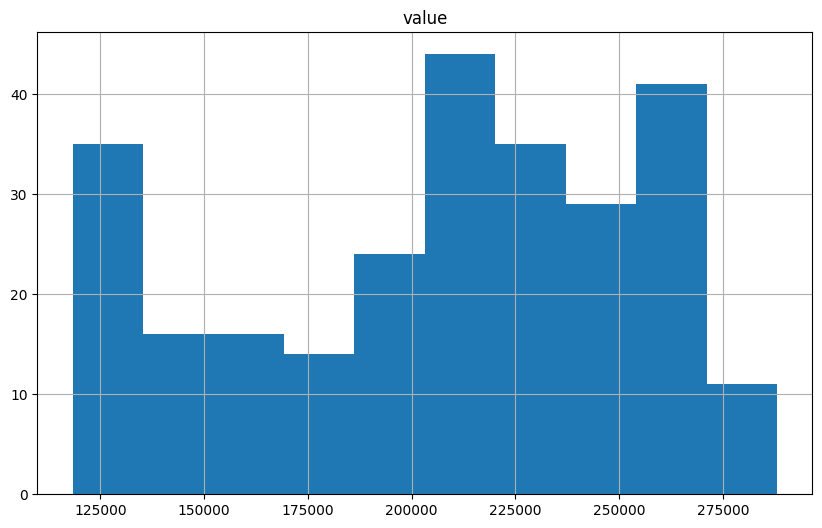

In [147]:
# Plotting a histogram
data3.hist(figsize=(10,6));

Based on the results, we can see that the data does not follow a normal distribution but is somehow skewed to the right. We will now create line plots for the monthly, quarterly, semi-annual and annual data after resampling.

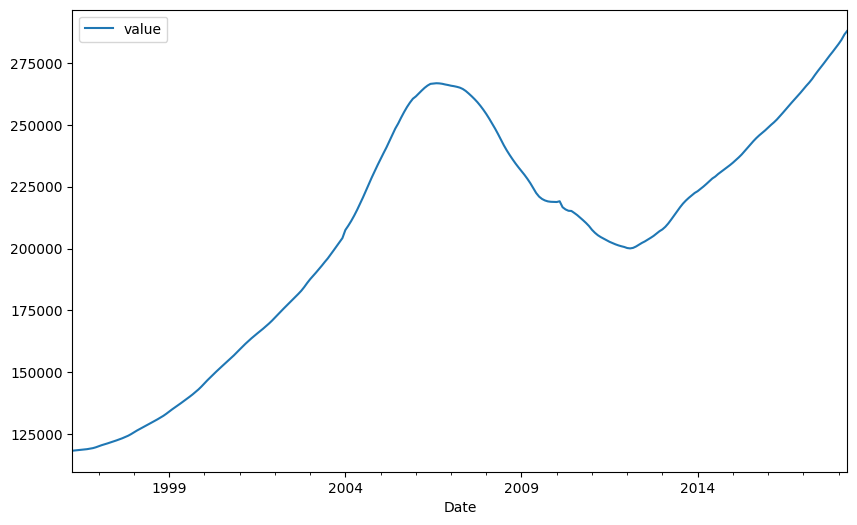

In [148]:
# Creating a line plot of the data
data3.plot(figsize=(10,6));

In [149]:
# Resampling to quarterly
quarterly_df = data3.resample('Q').mean()
quarterly_df.head()

,value
Date,
1996-06-30,118418.530157
1996-09-30,118786.950697
1996-12-31,119383.652441
1997-03-31,120520.710319
1997-06-30,121659.059242


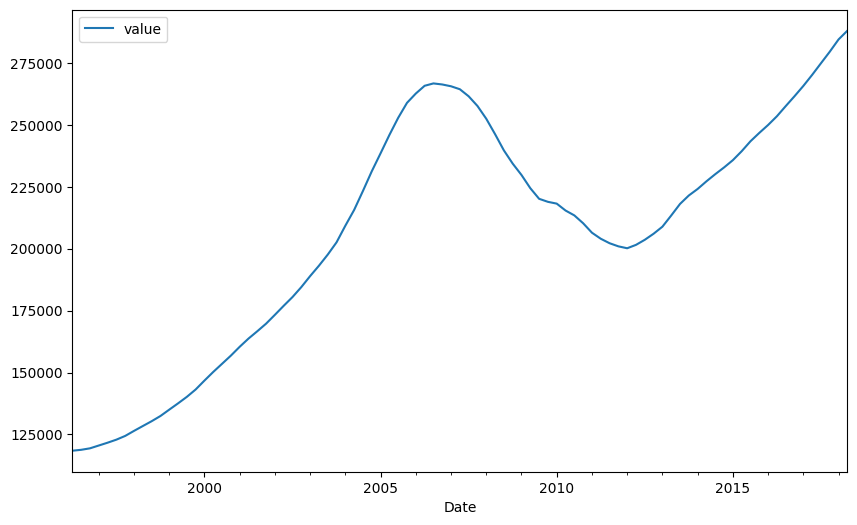

In [150]:
# Plotting data resampled quarterly
quarterly_df.plot(figsize=(10,6));

In [151]:
# Semi-annual resampling
semiannual_df = data3.resample('2Q').mean()
semiannual_df.head()

,value
Date,
1996-06-30,118418.530157
1996-12-31,119085.301569
1997-06-30,121089.884780
1997-12-31,123640.518816
1998-06-30,127404.630915


<Axes: xlabel='Date'>

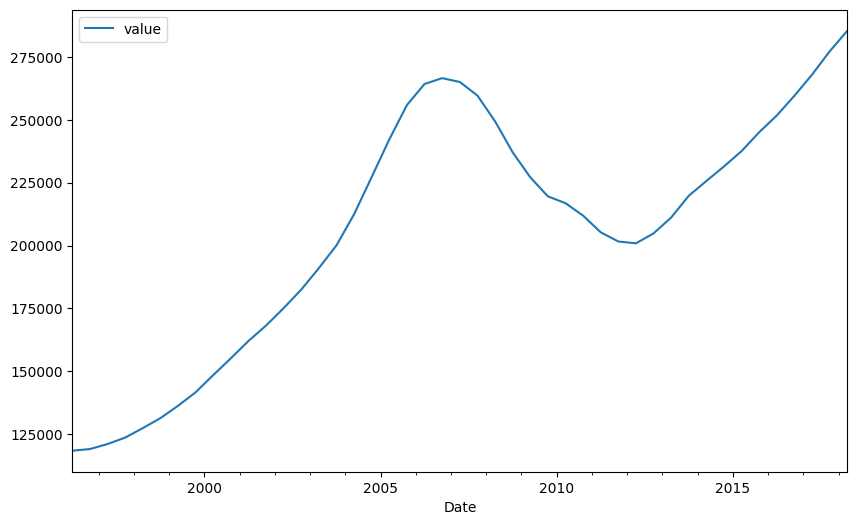

In [152]:
# Plotting data resampled semi-annually
semiannual_df.plot(figsize=(10,6))

In [153]:
# Annual Resampling
annual_df = data3.resample('Y').mean()
annual_df.head()

,value
Date,
1996-12-31,118863.044431
1997-12-31,122365.201798
1998-12-31,129392.784516
1999-12-31,138962.489345
2000-12-31,151834.752563


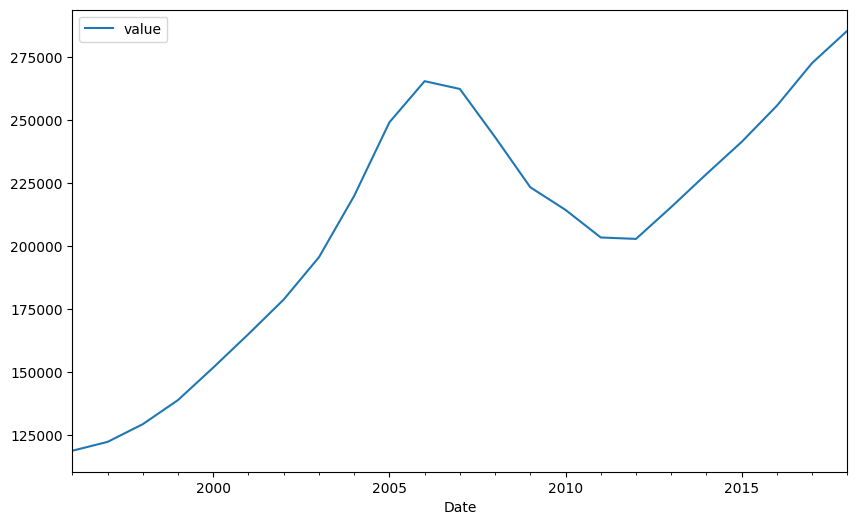

In [154]:
# A plot of data resampled annually
annual_df.plot(figsize=(10,6));

Based on the monthly, quarterly, semi-annual, and annual graphs, we can see that there is an upward trend from 1996 to 2018. However, there is a decrease between 2006 and 2013, which is attributed to the recession and the 2008 market crash. We can also see that there is no seasonality detected in the data. We can now look at the rolling statistics and conduct the Dickey-Fuller test to check for stationarity. 

In [155]:
# Rolling mean
roll_mean = data3.rolling(window=12, center=False).mean()
roll_std = data3.rolling(window=12, center=False).std()

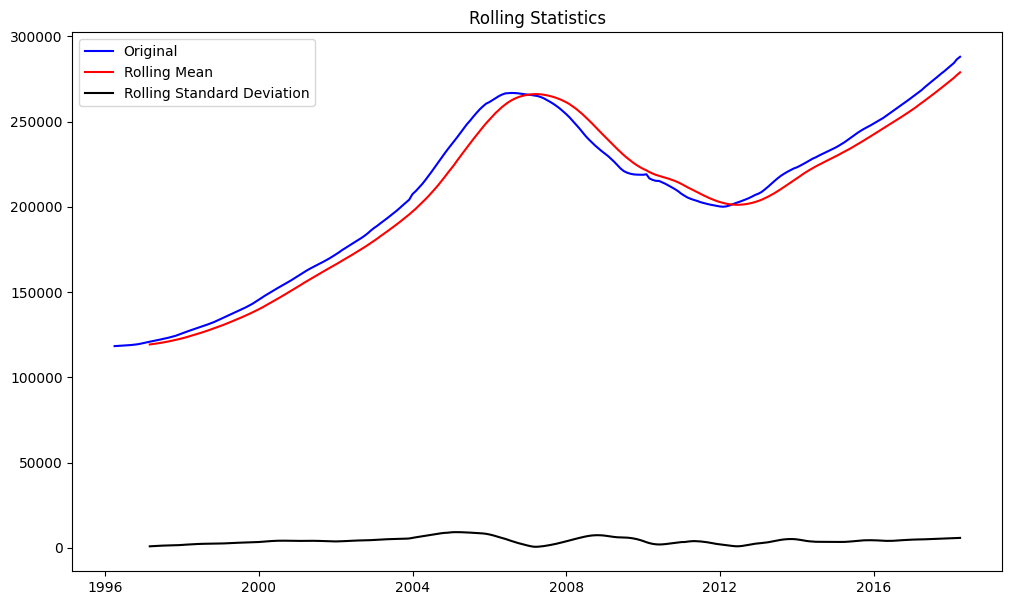

In [156]:
# Plotting the rolling statistics 
fig = plt.figure(figsize=(12,7))
plt.plot(data3, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False);

In [157]:
# Dickey-Fuller Test
dftest = adfuller(data3)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -1.885145
p-value                          0.339082
#Lags Used                       2.000000
Number of Observations Used    262.000000
Critical Values (1%)            -3.455558
Critical Values (5%)            -2.872636
Critical Values (10%)           -2.572683
dtype: float64


Based on the plot and the p-value, we can see that our data is not stationary. This is because the rolling mean follows the same trend as the original data. The other reason is because the p-value of 0.34 is greater than 0.05. This will be dealt with in the modeling part of this project. 

## Time Series Modeling  

### Preprocessing

Previously, we saw that our data was not stationary and to meet the assumptions of the ARIMA model we need to make the data stationary

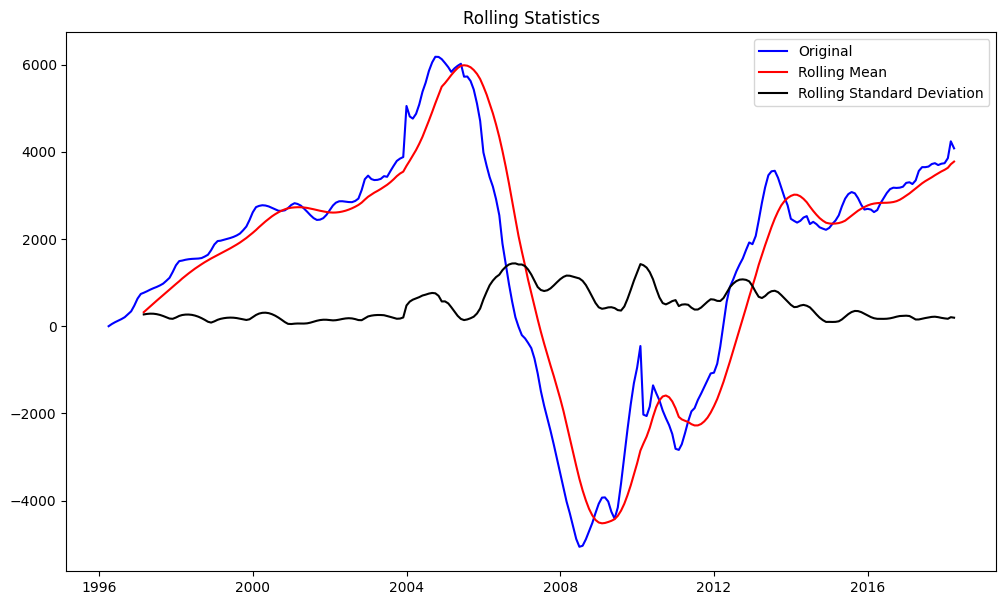

In [158]:
exp_rolling_mean = data3.ewm(halflife=2).mean()
data3_minus_exp_roll_mean = data3 - exp_rolling_mean
roll_mean2 = data3_minus_exp_roll_mean.rolling(window=12, center=False).mean()
roll_std2 = data3_minus_exp_roll_mean.rolling(window=12, center=False).std()

#Plot
fig = plt.figure(figsize=(12,7))
plt.plot(data3_minus_exp_roll_mean, color='blue', label='Original')
plt.plot(roll_mean2, color='red', label='Rolling Mean')
plt.plot(roll_std2, color='black', label='Rolling Standard Deviation')

plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False);

In [159]:
#Dickey-Fuller Test
dftest = adfuller(data3_minus_exp_roll_mean)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.723136
p-value                          0.070120
#Lags Used                      10.000000
Number of Observations Used    254.000000
Critical Values (1%)            -3.456360
Critical Values (5%)            -2.872987
Critical Values (10%)           -2.572870
dtype: float64


In [160]:
#We start with a differencing of one
df_diff = data3_minus_exp_roll_mean.diff(periods=1).dropna()
df_diff.head()

,value
Date,
1996-05-01,49.672936
1996-06-01,42.237790
1996-07-01,34.590063
1996-08-01,36.926587
1996-09-01,43.271467


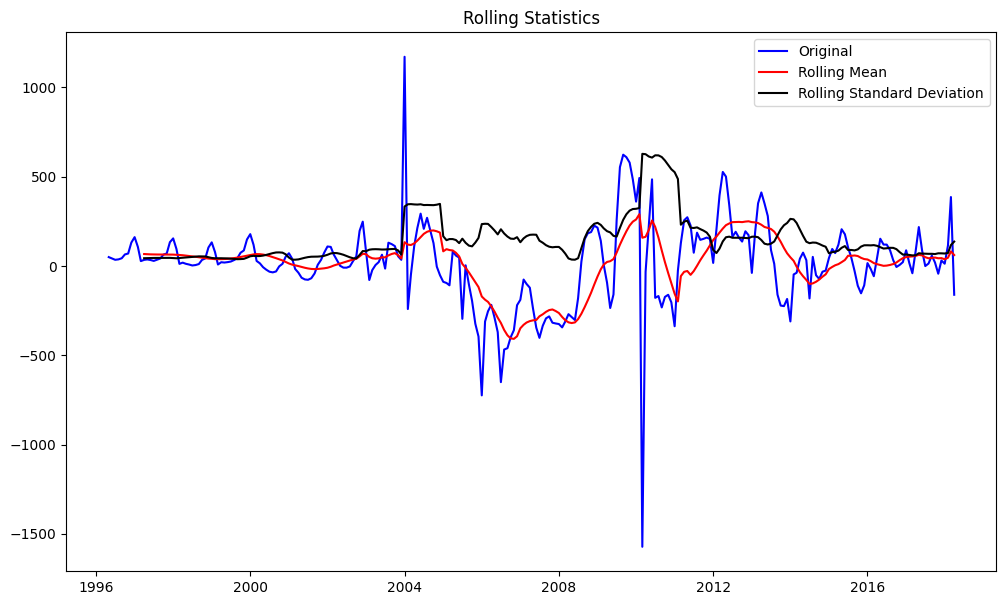

In [161]:
#Plotting to see if the data is stationary

# Calculate rolling mean and rolling standard deviation
roll_mean2 = df_diff.rolling(window=12, center=False).mean()
roll_std2 = df_diff.rolling(window=12, center=False).std()

#Plot
fig = plt.figure(figsize=(12,7))
plt.plot(df_diff, color='blue', label='Original')
plt.plot(roll_mean2, color='red', label='Rolling Mean')
plt.plot(roll_std2, color='black', label='Rolling Standard Deviation')

plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False);

From the plot we can see that our data is not stationary, for confirmation we have the Dickey-Fuller test below:  

In [162]:
#Dickey-Fuller Test
dftest = adfuller(df_diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.598253
p-value                          0.093359
#Lags Used                       9.000000
Number of Observations Used    254.000000
Critical Values (1%)            -3.456360
Critical Values (5%)            -2.872987
Critical Values (10%)           -2.572870
dtype: float64


The null hypothesis for the Dickey-Fuller test is that the time series is not stationary.  
The p-value is at 0.104 more than 0.05 and the test statistic more than the critical values, therefore we fail to reject the null hypothesis and conclude that our data is not stationary

In [163]:
#Differencing the data again
df_diff2 = df_diff.diff(periods=1).dropna()
df_diff2.head()

,value
Date,
1996-06-01,-7.435146
1996-07-01,-7.647728
1996-08-01,2.336524
1996-09-01,6.344881
1996-10-01,21.303074


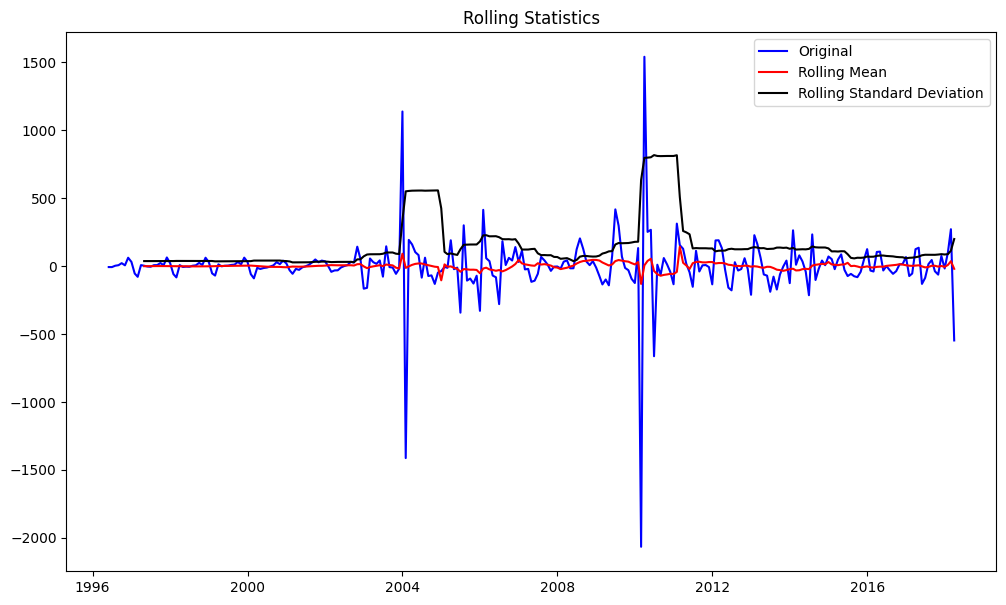

In [164]:
#Plotting to check stationarity

#Calculating rolling mean and rolling standard deviation 
roll_mean3 = df_diff2.rolling(window=12, center=False).mean()
roll_std3 = df_diff2.rolling(window=12, center=False).std()

#Plot
fig = plt.figure(figsize=(12,7))
plt.plot(df_diff2, color='blue', label='Original')
plt.plot(roll_mean3, color='red', label='Rolling Mean')
plt.plot(roll_std3, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False);

In [165]:
#Dickey-Fuller Test
dftest = adfuller(df_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.598407e+00
p-value                        1.950057e-16
#Lags Used                     8.000000e+00
Number of Observations Used    2.540000e+02
Critical Values (1%)          -3.456360e+00
Critical Values (5%)          -2.872987e+00
Critical Values (10%)         -2.572870e+00
dtype: float64


The p-value is at 0.00 which is less than 0.05 and the test statistic is less than the critical values, therefore we therefore  reject the null hypothesis and conclude that our data is now stationary.

Before creating our model we will plot the Autocorrelation and Partial Autocorrelation Graphs to decide on the order of the baseline ARIMA model

#### Autocorrelation Graph

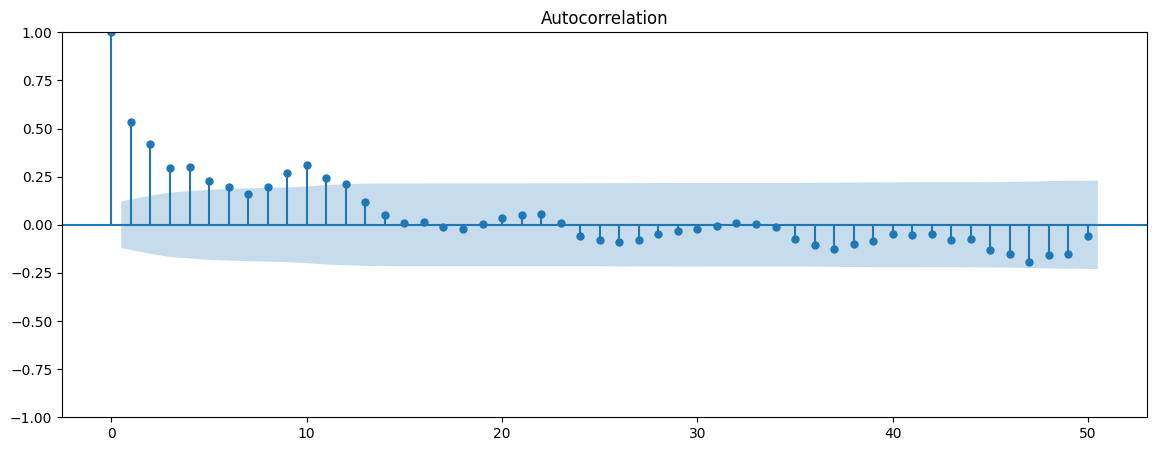

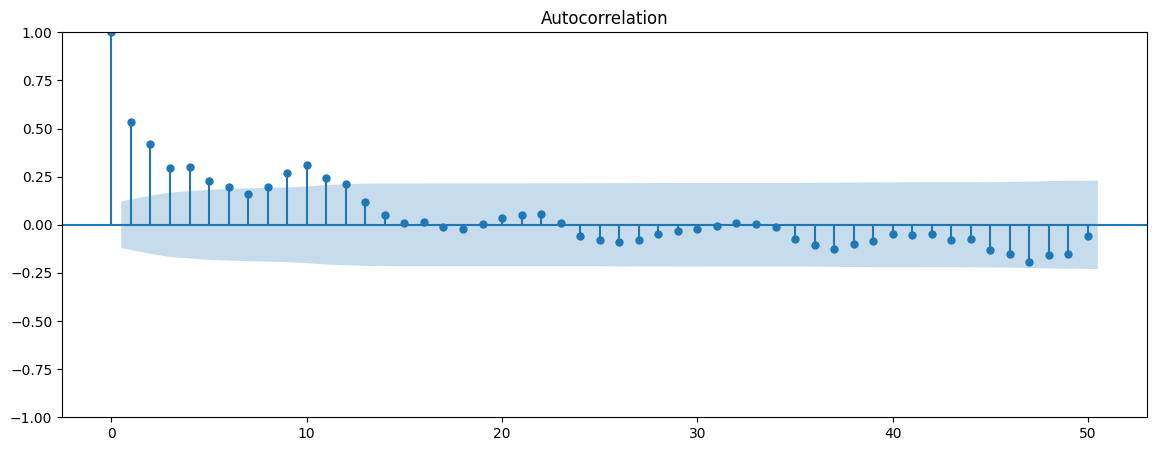

In [166]:
# Plotting ACF
rcParams['figure.figsize'] = 14, 5
plot_acf(df_diff, lags=50)

#### Partial Autocorrelation

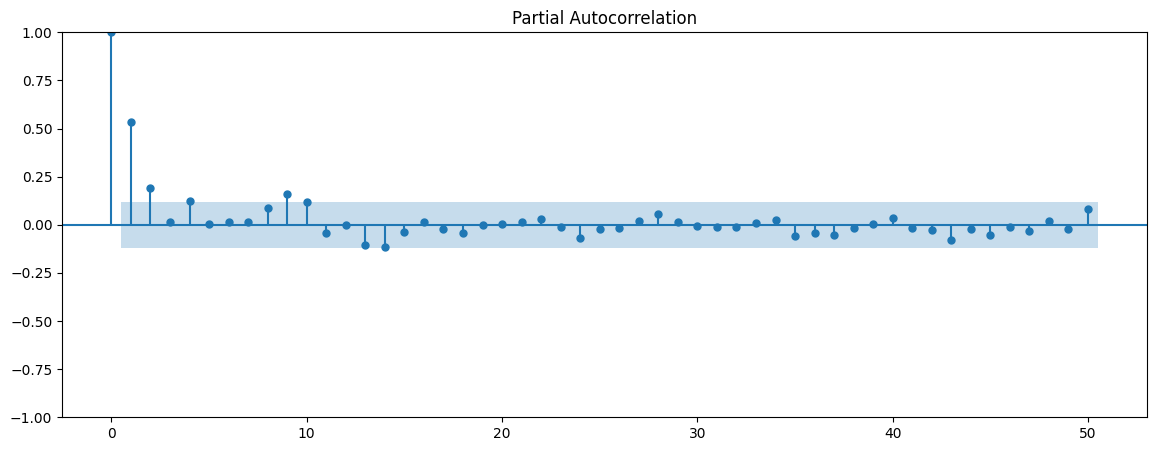

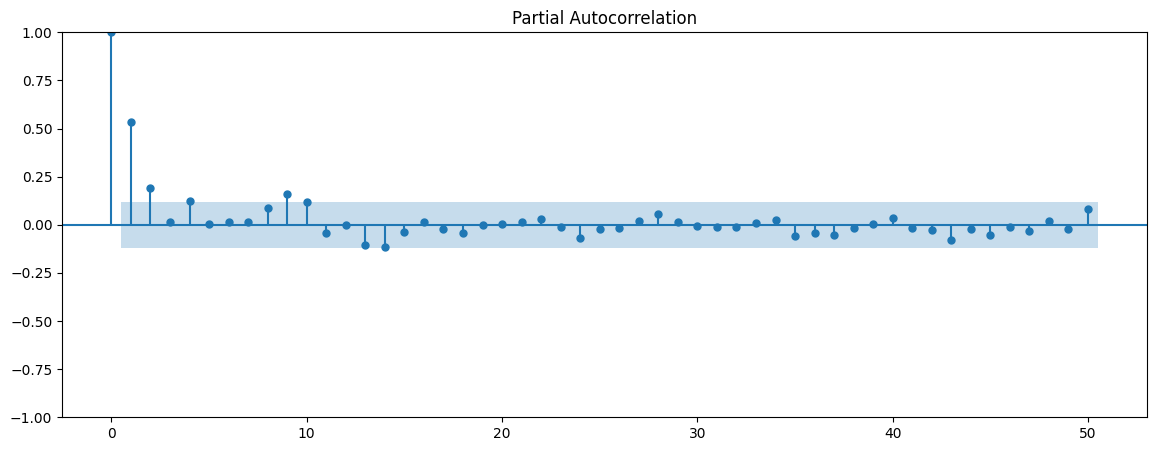

In [167]:
# Plotting PACF
rcParams['figure.figsize'] = 14, 5
plot_pacf(df_diff, lags=50)

For better model evaluation we decide to split our data to have a train and test data

In [168]:
#Data splitting at 75% of the data
train_size = int(len(df_diff2) * 0.75) 
train, test = df_diff2.iloc[:train_size], df_diff2.iloc[train_size:]
print(train.shape)
print(test.shape)

(197, 1)
(66, 1)


We also need to create a function that returns both the RMSE and the MAE of each model.

In [169]:
#Function to calculate rmse and mae
def metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f'RMSE: {rmse}\nMAE: {mae}')

With that, we can head over and create our first ARIMA model.

### ARIMA model.

Here, we will create an ARIMA model that will help predict the future real estate values in the United States.
We will begin by creating a baseline ARIMA model. Based on the ACF and PACF plots, we will create an ARIMA(1, 1) model as our baseline.

In [170]:
#The baseline model
baseline_model = ARIMA(train, order=(1, 0, 1))
res_arima = baseline_model.fit()
y_hat_baseline = res_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
res_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  197
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1338.584
Date:                Thu, 25 Jul 2024   AIC                           2685.168
Time:                        15:23:29   BIC                           2698.301
Sample:                    06-01-1996   HQIC                          2690.485
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8316      4.155      0.200      0.841      -7.313       8.976
ar.L1          0.2822      0.054      5.207      0.000       0.176       0.388
ma.L1         -0.8500      0.051    -16.591      0.000      -0.950      -0.750
sigma2      4.652e+04   1971.929     23.592      0.000    4.27e+04    5.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             12051.24
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):              53.14   Skew:                            -3.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
# Checking the metrics of the model.
metrics(test, y_hat_baseline)

RMSE: 121.93961027370166
MAE: 85.96504887671199


From the baseline model we have an RMSE of 121.94 and a Mean Absolute Error of 85.97, which is not a bad score but to try and improve it we tried a different model. We will go ahead and create an ARIMA(1, 3) model.

In [172]:
# Second ARIMA model
model2 = ARIMA(train, order=(1, 0, 3))
res_arima2 = model2.fit()
y_hat_2 = res_arima2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
res_arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  197
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -1336.951
Date:                Thu, 25 Jul 2024   AIC                           2685.903
Time:                        15:23:30   BIC                           2705.602
Sample:                    06-01-1996   HQIC                          2693.877
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8439      4.300      0.196      0.844      -7.584       9.272
ar.L1         -0.4405      0.321     -1.370      0.171      -1.070       0.189
ma.L1         -0.1341      0.321     -0.418      0.676      -0.763       0.495
ma.L2         -0.3382      0.203     -1.663      0.096      -0.737       0.060
ma.L3         -0.2199      0.083     -2.642      0.008      -0.383      -0.057
sigma2      4.575e+04   1921.078     23.813      0.000     4.2e+04    4.95e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12810.22
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              52.36   Skew:                            -3.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [173]:
# Checking the metrics
metrics(test, y_hat_2)

RMSE: 122.23455054700337
MAE: 86.27393212839742


The second ARIMA model has an RMSE of 122.23 and MAE of 86.27 which is slightly worse than the baseline model. We will then try an ARIMA(3,1) model to see if our model improves.

In [174]:
# Third ARIMA model
model3 = ARIMA(train, order=(3, 0, 1))
res_arima3 = model3.fit()
y_hat_3 = res_arima3.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
res_arima3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  197
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -1337.345
Date:                Thu, 25 Jul 2024   AIC                           2686.691
Time:                        15:23:33   BIC                           2706.390
Sample:                    06-01-1996   HQIC                          2694.665
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8478      4.343      0.195      0.845      -7.664       9.360
ar.L1          0.2601      0.065      4.011      0.000       0.133       0.387
ar.L2          0.0838      0.061      1.371      0.170      -0.036       0.204
ar.L3         -0.0944      0.093     -1.020      0.308      -0.276       0.087
ma.L1         -0.8402      0.066    -12.813      0.000      -0.969      -0.712
sigma2      4.594e+04   2026.304     22.670      0.000     4.2e+04    4.99e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12251.17
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              53.60   Skew:                            -3.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [175]:
# Checking the metrics
metrics(test, y_hat_3)

RMSE: 122.23545912854881
MAE: 86.18167695400764


The third model, ARIMA(3,0,1) has an RMSE of 122.24 and MAE of 86.18 which is almost similar to the second model. We will now create a for loop that iterates over different (p, d, q) combinations and determine the best one based off RMSE performance.

In [176]:
#Code to iterate through the values of p,d and q modeling each combination 
p = range(0, 10)
q = range(0, 10)
d = range(0, 2)

pdq_combinations = list(itertools.product(p, d, q))

rmse = []
order = []

for pdq in pdq_combinations:
    try:
        model = ARIMA(train, order=pdq).fit()
        y_hat = model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
        error = np.sqrt(mean_squared_error(test, y_hat))
        order.append(pdq)
        rmse.append(error)
    except: 
        continue

In [177]:
#Results from the code above
results = pd.DataFrame(index=order, data=rmse, columns=['RMSE'])
min_value_order = results.idxmin().values[0]
print(min_value_order)

(7, 1, 8)


According to the code above the best performing ARIMA model is ARIMA(7,1,8). We will now create an ARIMA model using this combination.

In [178]:
# Creating the final ARIMA model
final_ARIMA_model = ARIMA(train, order=(7, 1, 8))
res_arima4 = final_ARIMA_model.fit()
y_hat_4 = res_arima4.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
res_arima4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  197
Model:                 ARIMA(7, 1, 8)   Log Likelihood               -1336.279
Date:                Thu, 25 Jul 2024   AIC                           2704.559
Time:                        15:27:36   BIC                           2757.009
Sample:                    06-01-1996   HQIC                          2725.793
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0359      2.566     -0.794      0.427      -7.064       2.992
ar.L2         -2.7352      3.235     -0.845      0.398      -9.076       3.606
ar.L3         -2.6793      4.737     -0.566      0.572     -11.963       6.604
ar.L4         -1.6136      3.468     -0.465      0.642      -8.411       5.183
ar.L5         -0.6329      2.062     -0.307      0.759      -4.673       3.408
ar.L6          0.2416      0.651      0.371      0.711      -1.035       1.518
ar.L7          0.2535      0.668      0.379      0.704      -1.056       1.563
ma.L1          0.4801      2.552      0.188      0.851      -4.521       5.482
ma.L2          0.0734      1.002      0.073      0.942      -1.891       2.038
ma.L3         -0.6944      1.203     -0.577      0.564      -3.052       1.664
ma.L4         -1.2202      2.822     -0.432      0.665      -6.750       4.310
ma.L5         -0.5261      0.984     -0.535      0.593      -2.455       1.403
ma.L6         -0.2473      1.170     -0.211      0.833      -2.541       2.046
ma.L7          0.7137      0.497      1.436      0.151      -0.260       1.688
ma.L8          0.4253      1.428      0.298      0.766      -2.374       3.225
sigma2      5.869e+04   1.76e+04      3.338      0.001    2.42e+04    9.31e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             11509.67
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              53.95   Skew:                            -3.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [179]:
# Checking the metrics
metrics(test, y_hat_4)

RMSE: 118.17096342096941
MAE: 84.99377381018955


The final ARIMA model performs better than all the other models. This is because both the RMSE and the MAE of this model are lower compared to the others.

However, the main issue with the ARIMA model is that it relies on stationarity, homoscedasticity and normality and the data does not follow a normal distribution. The AIC and BIC scores for the models are too big. For those reasons, we opted for another model algorithm, Prophet, and see if our model will perform any better.

### Prophet model.

Prophet is a time series forecasting library from Meta. To be able to build a model with Prophet we need to reset the index of our train and test datasets.

In [180]:
#Resetting the index of the train data
train2 = train.reset_index()
train2 = train2.rename(columns={'Date': 'ds', 'value': 'y'})
test2 = test.reset_index()
test2 = test2.rename(columns={'Date': 'ds', 'value': 'y'})

We will now create a baseline Prophet model using default parameters.

In [181]:
#Prophet model with default hyperparameters
prophet_model1 = Prophet()
prophet_model1.fit(train2)
future_dates1 = prophet_model1.make_future_dataframe(periods=len(test2), freq='M') 
forecast1 = prophet_model1.predict(future_dates1)
test_predictions1 = forecast1['yhat'][-len(test2):]
metrics(test2['y'], test_predictions1)

15:27:36 - cmdstanpy - INFO - Chain [1] start processing
15:27:36 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 142.3474293300567
MAE: 95.68525766456938


From the model above the RMSE is at 142.35 and 95.67 which are worse than our previous models. We will go ahead and conduct manual hyerparameter tuning to create a better model. 

In [182]:
# Manual Hyperparameter tuning for the prophet model
param_grid = {
    "changepoint_prior_scale": [0.01, 0.1, 1.0],
    "seasonality_mode": ["additive", "multiplicative"],
}

# Perform manual hyperparameter tuning
best_rmse = np.inf
best_params = None

for changepoint_prior_scale in param_grid["changepoint_prior_scale"]:
    for seasonality_mode in param_grid["seasonality_mode"]:
        model = Prophet(
            changepoint_prior_scale=changepoint_prior_scale,
            seasonality_mode=seasonality_mode,
        )

        # Fit the model on the training data
        model.fit(train2)

        # Make predictions on the validation set
        future = model.make_future_dataframe(periods=len(test2))
        forecast = model.predict(future)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test2["y"], forecast["yhat"][:len(test2)]))

        # Check if the current combination of hyperparameters is the best
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {
                "changepoint_prior_scale": changepoint_prior_scale,
                "seasonality_mode": seasonality_mode,
            }

print("Best Hyperparameters:", best_params)

15:27:37 - cmdstanpy - INFO - Chain [1] start processing
15:27:37 - cmdstanpy - INFO - Chain [1] done processing
15:27:37 - cmdstanpy - INFO - Chain [1] start processing
15:27:37 - cmdstanpy - INFO - Chain [1] done processing
15:27:38 - cmdstanpy - INFO - Chain [1] start processing
15:27:38 - cmdstanpy - INFO - Chain [1] done processing
15:27:38 - cmdstanpy - INFO - Chain [1] start processing
15:27:38 - cmdstanpy - INFO - Chain [1] done processing
15:27:38 - cmdstanpy - INFO - Chain [1] start processing
15:27:38 - cmdstanpy - INFO - Chain [1] done processing
15:27:39 - cmdstanpy - INFO - Chain [1] start processing
15:27:39 - cmdstanpy - INFO - Chain [1] done processing


Best Hyperparameters: {'changepoint_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


The parameters chosen are a changepoint_prior_scale of 1.0 and a multiplicative seasonality_mode. We will create a model using the suggested hyperparameters.

In [183]:
# Creating a Prophet model using the suggested hyperparameters
param_dict = {'changepoint_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}
prophet_model2 = Prophet(**param_dict)
prophet_model2.fit(train2)
future_dates = prophet_model2.make_future_dataframe(periods=len(test2), freq='M')
forecast = prophet_model2.predict(future_dates)
test_predictions2 = forecast['yhat'][-len(test2):]
metrics(test2['y'], test_predictions2)

15:27:39 - cmdstanpy - INFO - Chain [1] start processing
15:27:40 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 122.51158916176053
MAE: 87.13381241217547


The tuned model gives an RMSE of 122.51 and MAE of 87.13 which is better than the first prophet model. However, it performs poorly than the ARIMA models. We will now use optuna for hyperparameter tuning and see if we can create a better model.

In [184]:
# Define the objective function to optimize
def objective(trial):
    # Create a Prophet model with suggested hyperparameters
    model = Prophet(
        changepoint_prior_scale=trial.suggest_float("changepoint_prior_scale", 0.001, 0.5),
        seasonality_mode=trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"]),
    )
    # Fit the model to the training data
    model.fit(train2)

    # Make predictions on the validation set
    future_dates = model.make_future_dataframe(periods=len(test2), freq='M')
    forecast = model.predict(future_dates)
    test_predictions = forecast['yhat'][-len(test2):]
    
    # Calculate evaluation metric (e.g., RMSE)
    rmse = np.sqrt(mean_squared_error(test2['y'], test_predictions))

    return rmse  # Minimize RMSE

# Create an Optuna study
study = optuna.create_study(direction="minimize")

# Run the optimization
study.optimize(objective, n_trials=100)  # Adjust the number of trials as needed

# Get the best hyperparameters
best_params = study.best_params

# Create the best model using the optimal hyperparameters
best_model = Prophet(**best_params)
# Fit the best model to the entire dataset
best_model.fit(train2)

# Predicting the values
future_dates = best_model.make_future_dataframe(periods=len(test2), freq='M')
forecast = best_model.predict(future_dates)
test_predictions3 = forecast['yhat'][-len(test2):]
metrics(test2['y'], test_predictions3)

[I 2024-07-25 15:27:40,197] A new study created in memory with name: no-name-281e715a-5eeb-4b23-ab80-3977f75d3f28
15:27:40 - cmdstanpy - INFO - Chain [1] start processing
15:27:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-25 15:27:40,654] Trial 0 finished with value: 121.9354232827965 and parameters: {'changepoint_prior_scale': 0.027561171080168895, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 121.9354232827965.
15:27:40 - cmdstanpy - INFO - Chain [1] start processing
15:27:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-25 15:27:41,021] Trial 1 finished with value: 142.5285094263355 and parameters: {'changepoint_prior_scale': 0.08294001040467215, 'seasonality_mode': 'additive'}. Best is trial 0 with value: 121.9354232827965.
15:27:41 - cmdstanpy - INFO - Chain [1] start processing
15:27:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-07-25 15:27:41,404] Trial 2 finished with value: 142.46644611591856 and parameters: {'change

RMSE: 121.87027240041206
MAE: 86.22260331843745


From the model above and the best parameters chosen by optuna our prophet model has an RMSE of 121.87 and an MAE of 86.22 which is better than the other prophet models. However, it is second to the best ARIMA model. With that, we will choose the ARIMA model as our final model. 

## Conclusion  
From the project we were able to answer all our objectives and had the following conclusion:  

1. The best zipcodes to invest in are: 
    1. 11211 - Brooklyn, New York
    2. 11222 - Brooklyn, New York
    3. 11216 - Brooklyn, New York
    4. 7302 - Jersey City, New Jersey  
    5. 11930 - Amagansett, New York.  

   The best cities to invest in are:
    1. New York
    2. Jersey City
    3. Amagansett
    4. Wainscott
    5. Harbeson

   The best states to invest in are:  
    1. New York
    2. New Jersey 
    3. Delaware  
    4. South Dakota 
    5. California

2.  We noted that there is an upward trend with our data, which suggests that the real estate value increases with time. There is no clear way to determine which time period is suitable to invest in Real Estate, since the data contained no seasonality.  

3. We created a predictive time series model. This will help in predicting future Real Estate values.


## Recommendation
1. From our finding it is advisable to invest in Real Estate, the data showed an upward trend, indicating appreciating values over the years.

2. To potential real estate investors, we recommend investing in the following states, New York, New Jersey, Colorado, Carlifornia and Washington DC, from the analysis these states showed promising Returns on Investment. The best zipcodes were found within the states mentioned, these are, 11211 - Brooklyn, New York, 11222 - Brooklyn, New York, 11216 - Brooklyn, New York, 7302 - Jersey City, New Jersey and 11215 - Brooklyn, New York.  

3. As a way to mitigate risk we recommend using the model created to forecast future values of Real Estate. This will help in giving accurate future Real Estate values.

### Next Steps  

1. To collect more data on Real Estate Values - more data will better inform the model and lead to better predictive results.

2. Continuous model training to improve accuracy of the model.

## Saving the model

In [185]:
# Save the model using joblib
with open('arima_model.pkl', 'wb') as f:
    joblib.dump(final_ARIMA_model, f)